In [1]:
import os
import pandas as pd
from pathlib import Path
from tqdm import tqdm

In [5]:
data_root = Path.cwd().parent.parent
df_path = data_root / 'data' / 'covid19_tweets.csv'
print(df_path)

/Users/gazimahmud/Documents/Harvard/CSCI-171/finalproject/cs171_tweet_it_out/data/covid19_tweets.csv


In [6]:
df = pd.read_csv(df_path)
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [7]:
df['source'].value_counts()

Twitter Web App        56891
Twitter for Android    40179
Twitter for iPhone     35472
TweetDeck               8543
Hootsuite Inc.          7321
                       ...  
WP to Twitter EPR          1
standard3d                 1
Apphi                      1
Emphatic                   1
BrentStafford.com          1
Name: source, Length: 610, dtype: int64

In [8]:
df['hashtags'][4]

"['CoronaVirusUpdates', 'COVID19']"

In [9]:
df.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

In [11]:
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [14]:
import warnings
warnings.filterwarnings('ignore')
from langdetect import detect
from tqdm import tqdm_notebook
tqdm_notebook().pandas()

In [22]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk import pos_tag

In [17]:
df['sentences'] = df.text.progress_map(sent_tokenize)
df['sentences'].head(1).tolist()[0][:3]

['If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0']

In [19]:
df['tokens_sentences'] = df['sentences'].progress_map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])
print(df['tokens_sentences'].head(1).tolist()[0][:3])


[['If', 'I', 'smelled', 'the', 'scent', 'of', 'hand', 'sanitizers', 'today', 'on', 'someone', 'in', 'the', 'past', ',', 'I', 'would', 'think', 'they', 'were', 'so', 'intoxicated', 'that…', 'https', ':', '//t.co/QZvYbrOgb0']]


In [21]:
df.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentences,tokens_sentences
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,[If I smelled the scent of hand sanitizers tod...,"[[If, I, smelled, the, scent, of, hand, saniti..."
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,[Hey @Yankees @YankeesPR and @MLB - wouldn't i...,"[[Hey, @, Yankees, @, YankeesPR, and, @, MLB, ..."
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,[@diane3443 @wdunlap @realDonaldTrump Trump ne...,"[[@, diane3443, @, wdunlap, @, realDonaldTrump..."
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,[@brookbanktv The one gift #COVID19 has give m...,"[[@, brookbanktv, The, one, gift, #, COVID19, ..."
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,[25 July : Media Bulletin on Novel #CoronaViru...,"[[25, July, :, Media, Bulletin, on, Novel, #, ..."


## Lemmatizing with POS tagging

morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word

In [25]:
import nltk
nltk.download('averaged_perceptron_tagger')
df['POS_tokens'] = df['tokens_sentences'].progress_map(lambda tokens_sentences: [pos_tag(tokens) for tokens in tokens_sentences])
print(df['POS_tokens'].head(1).tolist()[0][:3])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/gazimahmud/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!



[[('If', 'IN'), ('I', 'PRP'), ('smelled', 'VBD'), ('the', 'DT'), ('scent', 'NN'), ('of', 'IN'), ('hand', 'NN'), ('sanitizers', 'NNS'), ('today', 'NN'), ('on', 'IN'), ('someone', 'NN'), ('in', 'IN'), ('the', 'DT'), ('past', 'JJ'), (',', ','), ('I', 'PRP'), ('would', 'MD'), ('think', 'VB'), ('they', 'PRP'), ('were', 'VBD'), ('so', 'RB'), ('intoxicated', 'JJ'), ('that…', 'NN'), ('https', 'NN'), (':', ':'), ('//t.co/QZvYbrOgb0', 'NN')]]


In [26]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [28]:
#!pip3 install wordnet
nltk.download('wordnet')
# Lemmatizing each word with its POS tag, in each sentence
df['tokens_sentences_lemmatized'] = df['POS_tokens'].progress_map(
    lambda list_tokens_POS: [
        [
            lemmatizer.lemmatize(el[0], get_wordnet_pos(el[1])) 
            if get_wordnet_pos(el[1]) != '' else el[0] for el in tokens_POS
        ] 
        for tokens_POS in list_tokens_POS
    ]
)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gazimahmud/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
df['tokens_sentences_lemmatized'].head(1).tolist()[0][:3]

[['If',
  'I',
  'smell',
  'the',
  'scent',
  'of',
  'hand',
  'sanitizers',
  'today',
  'on',
  'someone',
  'in',
  'the',
  'past',
  ',',
  'I',
  'would',
  'think',
  'they',
  'be',
  'so',
  'intoxicated',
  'that…',
  'http',
  ':',
  '//t.co/QZvYbrOgb0']]

## Regrouping tokens and removing stop words

In [30]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_verbs = ['say', 'get', 'go', 'know', 'may', 'need', 'like', 'make', 'see', 'want', 'come', 'take', 'use', 'would', 'can']
stopwords_other = ['one', 'mr', 'bbc', 'image', 'getty', 'de', 'en', 'caption', 'also', 'copyright', 'something']
my_stopwords = stopwords.words('English') + stopwords_verbs + stopwords_other

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gazimahmud/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
from itertools import chain # to flatten list of sentences of tokens into list of tokens

In [32]:
df['tokens'] = df['tokens_sentences_lemmatized'].map(lambda sentences: list(chain.from_iterable(sentences)))
df['tokens'] = df['tokens'].map(lambda tokens: [token.lower() for token in tokens if token.isalpha() 
                                                    and token.lower() not in my_stopwords and len(token)>1])

In [33]:
df['tokens'].head(1).tolist()[0][:30]

['smell',
 'scent',
 'hand',
 'sanitizers',
 'today',
 'someone',
 'past',
 'think',
 'intoxicated',
 'http']

## Latent Dirichlet Allocation (LDA)

## Data prep

In [34]:
#!pip3 install gensim
from gensim.models import Phrases

In [36]:
tokens = df['tokens'].tolist()
bigram_model = Phrases(tokens)
trigram_model = Phrases(bigram_model[tokens], min_count=1)
tokens = list(trigram_model[bigram_model[tokens]])

#### Prepare objects for LDA gensim implementation

In [37]:
from gensim import corpora

In [38]:
dictionary_LDA = corpora.Dictionary(tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(tok) for tok in tokens]

In [39]:
from gensim import models
import numpy as np

In [41]:
np.random.seed(123456)
num_topics = 20
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

CPU times: user 1min 26s, sys: 468 ms, total: 1min 26s
Wall time: 1min 27s


In [42]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic)
    print()

0: 0.085*"number" + 0.064*"school" + 0.063*"lockdown" + 0.052*"find" + 0.038*"daily" + 0.034*"rise" + 0.033*"cdc" + 0.020*"actually" + 0.019*"less" + 0.019*"company" + 0.018*"deaths" + 0.017*"add" + 0.017*"employee" + 0.015*"full" + 0.015*"california" + 0.014*"office" + 0.014*"possible" + 0.014*"instead" + 0.014*"hour" + 0.014*"require"

1: 0.070*"read" + 0.052*"give" + 0.051*"really" + 0.048*"wear_mask" + 0.040*"people" + 0.038*"via" + 0.036*"increase" + 0.035*"usa" + 0.028*"post" + 0.027*"already" + 0.026*"dead" + 0.019*"hey" + 0.016*"despite" + 0.016*"meet" + 0.016*"reason" + 0.016*"thread" + 0.014*"tweet" + 0.013*"nearly" + 0.013*"policy" + 0.011*"twitter"

2: 0.069*"even" + 0.055*"well" + 0.044*"total" + 0.035*"last" + 0.034*"america" + 0.032*"safe" + 0.026*"cause" + 0.026*"person" + 0.025*"team" + 0.025*"important" + 0.025*"someone" + 0.023*"americans" + 0.018*"enough" + 0.017*"money" + 0.016*"remain" + 0.014*"saw" + 0.013*"covidiots" + 0.012*"push" + 0.012*"active_case" + 0.012*

In [43]:
document = '''If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that‚Ä¶ https://t.co/QZvYbrOgb0
Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A‚Ä¶ https://t.co/1QvW0zgyPu
@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to‚Ä¶ https://t.co/Jkk8vHWHb3
@brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me‚Ä¶ https://t.co/Z0pOAlFXcW
"25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 
@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANI‚Ä¶ https://t.co/MN0EEcsJHh"
#coronavirus #covid19 deaths continue to rise. It's almost  as bad as it ever was.  Politicians and businesses want‚Ä¶ https://t.co/hXMHooXX2C
How #COVID19 Will Change Work in General (and recruiting, specifically) via/ @ProactiveTalent #Recruiting‚Ä¶ https://t.co/bjZxzGPMbK
You now have to wear face coverings when out shopping - this includes a visit to your local Community Pharmacy‚Ä¶ https://t.co/OSu5Q4kdd7
"Praying for good health and recovery of @ChouhanShivraj .
#covid19
#covidPositive"
"POPE AS GOD - Prophet Sadhu Sundar Selvaraj. Watch here at https://t.co/7X5RTyKVji 

#HurricaneHanna #COVID19‚Ä¶ https://t.co/06dZcGUnwL"
"49K+ Covid19 cases still no response from 
@cbseindia29 @HRDMinistry @DrRPNishank.Please cancel the compartment exa‚Ä¶ https://t.co/kV2ZKmumu1"
"Order here: https://t.co/4NUrGX6EmA

#logo #graphicdesigner #logodesign #logodesinger #icon  #minimalist #Abstract‚Ä¶ https://t.co/0yPMoGqi9s"
üëãüèª@PattyHajdu @NavdeepSBains ‚Äî no one will be safe from #COVID19 until everyone is safe. Will you commit to ensure‚Ä¶ https://t.co/aWCJo6eKvC
"Let's all protect ourselves from #COVID19.
It's real and the numbers are climbing up fast in the Continent.
Let's n‚Ä¶ https://t.co/byMSfxltrw"
Rajasthan Government today started a Plasma Bank at Sawai Man Singh Hospital in Jaipur for treatment of COVID-19 pa‚Ä¶ https://t.co/cwfCcWyaDA
"Nagaland police on Covid-19 Awareness at City Tower Junction Dimapur.

#Covid19 #keepsocialdistance‚Ä¶ https://t.co/WOvFMqhuEO"
"July 25 #COVID19 update
#TamilNadu - 6988
Discharge- 7758
People tested - 61729
Actice cases - 52273
#chennai - 1329"
Second wave of #COVID19 in Flanders..back to more #homework again... https://t.co/9swImZACMN
"It is during our darkest moments that we must focus to see the #light.~Aristotle 
https://t.co/YLlS4Kj85c‚Ä¶ https://t.co/tFJB7l1Kaw"
COVID Update: The infection rate in Florida is following the natural curve that experts predicted if the initial cu‚Ä¶ https://t.co/hmEwE747WK
"@EvanAKilgore @realDonaldTrump Good Patriots!
Call to Volunteer to be an Election Judge. 
Polls cannot open without‚Ä¶ https://t.co/qA3mA4zedZ"
Coronavirus - South Africa: COVID-19 update for South Africa (24 July 2020) @nicd_sa @MoetiTshidi @WHOAFRO‚Ä¶ https://t.co/WQzAdkpXC5
@JimBnntt Your image doesn't list a source, but I'd be careful with overall "risk of dying" statistics related to‚Ä¶ https://t.co/GRjVq8vYMy
"The first comprehensive review of #WASH &amp; #COVID19.

Analysis: key ways in which WASH can help reduce transmission‚Ä¶ https://t.co/eCsfDmo9b4"
Holy water in times of #COVID19 https://t.co/YaZ49yxL27
"#Kolar
Need #Blood Type :  B-positive
At : Jalappa Hospital
Blood Component : Need Plasma from B+ve #COVID19 recove‚Ä¶ https://t.co/XtgxULc02Z"
Our Munitions Response Team in #BosniaandHerzegovina modified ops and adopted masks, disinfectants, and sanitizers‚Ä¶ https://t.co/lMbKXlw1wQ
I can imagine the same people profiting off the human suffering of #COVID19 will be studying these maps to make 207‚Ä¶ https://t.co/NElsmGju2H
"#TNCoronaUpdate

#TN crosses 2 lakh mark and 1,50,055 ppp has recovered so far.

#COVID19 positive today 6988/total‚Ä¶ https://t.co/QdJkpcc7qv"
"@ratasjuri TAX Reform

Tax-free minimum:
For a company of five hundred thousand euros per year.

Tax-free minimum:‚Ä¶ https://t.co/gD0Q6ujjbl"
#FEMA acknowledges #PuertoRico lacks rebuilt homes and a hospital to survive #COVID19  https://t.co/PLXqKc5K5d
"Actor @VishalKOfficial and his father Mr.G.K.Reddy tested positive for #Covid19 15/20 days back..

While #Vishal 's‚Ä¶ https://t.co/V5Lo8NRLWY"
An update on the total #covid19 cases, recoveries, and deaths reported in countries in #Africa.  See the total numb‚Ä¶ https://t.co/eqCJ3EhwRi
@unionwill @megawedgy @jjhorgan ‚ÄúRegarding the community outbreak of #COVID19 on Haida Gwaii: 13 cases (one recover‚Ä¶ https://t.co/rJzuY60qY7
A safe place to visit? Here is what our guests said, "The hotel were meticulous in applying hand sanitation and als‚Ä¶ https://t.co/PVCji8s1Eg
Our CEO @RamneekHH live with @SASCO_Jikelele WSU talking about, ‚ÄúThe effects of Covid-19 on students‚Äù.‚Ä¶ https://t.co/VMN2LxHAds
@NicoleKowalski5 @chrisdameanor19 I'm feeling a little anxious because #COVID19 seems to have detracted everyone's‚Ä¶ https://t.co/A3mHdXamLg
Actionables for a healthy recovery from #COVID19 #climate  https://t.co/crGlKZOz5Z
"@jfoster2019 @bbclaurak Well #BorisJohnson might have understood more if he hadn't missed #5COBRA meeting #Five 
In‚Ä¶ https://t.co/mQPAgCYGn2"
"We released two new #COVID19 podcast episodes this week:
-Technology Platforms Used to Conduct Telehealth Visits
-C‚Ä¶ https://t.co/G94VeYVCzk"
#PlayYourPart in the fight against #COVID19 . Each one of us can make a difference in containing the spread, lets‚Ä¶ https://t.co/fRzLgrS8Qf
Britain didn't understand #Covid19 for months, while plenty of other countries did understand it and took effective‚Ä¶ https://t.co/KV2CAQ6skZ
Volume for those at the back please. üîä #COVID19 https://t.co/d0pn2Bv2Hx
#Delhi reports 1,142 #COVID19 positive cases and 29 deaths on Saturday. Death toll rises to 3,806, reports ANI quot‚Ä¶ https://t.co/JxsVpWMRQS
@realDonaldTrump Venezuela's Economy/Budget are tied to Oil like Louisiana's. Funny how the right-wing "example" of‚Ä¶ https://t.co/qvHvKlTbbv
"#TamilNadu | #COVID19 |  25th July

‚óè  TN - 6,988 (Highest Spike)

‚óè  Total Cases  - 2,06,737

‚óè  Chennai - 1,329‚Ä¶ https://t.co/X8zgUzC0Gr"
"Why has Ruto not eulogisied Mkapa!! 
Asking for Moses Kuria 

Raila 
#RutoSwindlingGEMA 
#COVID19"
Coronavirus Testing Fiasco: St Mirren¬†have pledged to undertake an "urgent review" of their Covid-19 testing proced‚Ä¶ https://t.co/0MCEUERQ74
Coronavirus Testing Fiasco: St Mirren¬†have pledged to undertake an "urgent review" of their Covid-19 testing proced‚Ä¶ https://t.co/AkxvIaD1Pr
"#TamilNadu | #COVID19 |  25th July
‚óè  TN - 6,988 (Highest Spike)
‚óè  Total Cases  - 2,06,737
‚óè  Chennai - 1,329
‚óè  T‚Ä¶ https://t.co/ZWFKJwZdEo"
Coronavirus Testing Fiasco: St Mirren¬†have pledged to undertake an "urgent review" of their Covid-19 testing proced‚Ä¶ https://t.co/Ifse0whbVE
Coronavirus Testing Fiasco: St Mirren¬†have pledged to undertake an "urgent review" of their Covid-19 testing proced‚Ä¶ https://t.co/dx8Yt7CvsM
Coronavirus Testing Fiasco: St Mirren¬†have pledged to undertake an "urgent review" of their Covid-19 testing proced‚Ä¶ https://t.co/h7p44XIzuk
Testing per 10 lakh population in Jammu and Kashmir has reached 44,744 as against 12,742 in the country; Recovery r‚Ä¶ https://t.co/jmxhF67V5V
Coronavirus Testing Fiasco: St Mirren¬†have pledged to undertake an "urgent review" of their Covid-19 testing proced‚Ä¶ https://t.co/bfel6gyXIq
Coronavirus Testing Fiasco: St Mirren¬†have pledged to undertake an "urgent review" of their Covid-19 testing proced‚Ä¶ https://t.co/eu5g2djZYx
.@nytimes reporting that yesterday 1145 people died of #COVID19 in the USA. Over 73K new cases were reported. Serio‚Ä¶ https://t.co/sFwP0v7FEB
Crazy that the world has come to this but as Americans we will fight to get through this!üá∫üá∏üá∫üá∏üá∫üá∏üá∫üá∏üá∫üá∏ #covid19
@jimsciutto @JoAnnBaldwin55 People whose relatives have died from #COVID19 should file a class action lawsuit against Sinclair Broadcasting.
"US #CoronaVirus: 4,249,584 cases and 148,521 deaths reported in the United States to date.

1,257 new cases and 31‚Ä¶ https://t.co/j4TreMnKW5"
"#IndiaFightsCorona :

üìç Do you agree that a mask is one of the most powerful accessories we have to fight against t‚Ä¶ https://t.co/5VauORkmjG"
I miss isopropyl alcohol so much!!!! Ethanol in hand sanitizer smells like I poured tequila on my hands ü§¢ #COVID19
GVMC sanitation staff carrying out the regular sanitation activities to keep the city clean and prevent the spread‚Ä¶ https://t.co/bkrQ5x6BCK
@SonuSood sir mom is in ICU due to COVID just want prayers from you and everyone who is listening you . #COVID19
Due to #COVID19 aka #Coronavirus Ill be sending the first 500 people to like &amp; retweet this $300 -$1500 through Cas‚Ä¶ https://t.co/3MkuUsGBDk
"This video had me in stitches
https://t.co/tadF3G6qKJ #obesity #ÿ≤Ÿàÿßÿ¨_ÿ±ÿßŸÉÿßŸÜ_ÿßŸÑÿ≠ÿ±ÿ®Ÿä #carryminati #my200vsbutch200‚Ä¶ https://t.co/fsZ8NTuVDg"
"See this Instagram post by @facts.covid19 https://t.co/glmd51L1OJ 
facts.covid19 Deaths rates not rising in lockste‚Ä¶ https://t.co/SeZieeSxAk"
Local government sales tax revenue dropped 27 percent year-to-year in the second quarter, thanks to #COVID19 shutdo‚Ä¶ https://t.co/oDky9LzrV5
Look at Lil‚Äô Donny Micro Dick go!! What an astounding achievement of brilliance + cognitive capabilities. Somebody‚Ä¶ https://t.co/82aEo6gL3q
"While you at it, please follow me

https://t.co/KheirQEh6Z

#Fergusons #DurbanJuly #alreadyvideo #COVID19 #WiseUp https://t.co/h1TYdOgjwv"
"Concealed Nation 1 Million Giveaway https://t.co/HaMym0cBe3 
I put my family's safety before all others, criminals‚Ä¶ https://t.co/7QQxVLWqZd"
Check out Angel's beautiful mask and hair bow designs at https://t.co/BpmP8tRs7M #etsy #epiconetsy #masksforsale‚Ä¶ https://t.co/fgl69zjMyq
Thread by @DrZoeHyde (based on international research and evidence) 1. Updated thread on children and #COVID19, sum‚Ä¶ https://t.co/A1xWVotp75
"1 municipality reports one new fatality due to #COVID19, compared to yesterday.

1 new fatality is located and 0 fa‚Ä¶ https://t.co/6iJ5lV7ZqR"
When your home walls need an upgradation, always opt for the experts. Hire #MumbaiPainters and let your walls find‚Ä¶ https://t.co/Kb5Yv2ZS9Z
"Covid to shrink power sector growth, take discoms back to pre-UDAY era


@fabeha_monir, a vi‚Ä¶ https://t.co/q3f9kP8rsq"
"@Haggis_UK ‚ÄúI think the government has hugely overestimated the danger of the disease‚Äù
I wonder if he‚Äôd be brave en‚Ä¶ https://t.co/gWJc6nUKqo"
By the time you see a spike in #Covid19 cases, it isvery hard to reverse it without drastic lockdown. By the time y‚Ä¶ https://t.co/A3S4AK3JH4
@realDonaldTrump @WhiteHouse See what your #political games with #Covid19 have achieved? This is not only shameful‚Ä¶ https://t.co/JXvuzUqwfC
Hi long time no see...... In preparation for us reopening we have been doing our homework and some...... #clean‚Ä¶ https://t.co/GjEe5w9uY2
@theJagmeetSingh @MatthewGreenNDP you took money at the beginning of the pandemic from woman front line workers who‚Ä¶ https://t.co/NXYIA38Rj6
How Ireland built its COVID-19 contract tracing app, which is so successful that U, S. states want to use it‚Ä¶ https://t.co/f0DavA6psh
"Rakesh Sharma best business Coach in India
Website: https://t.co/oG44LxC2Gg
#salescoach
#BusinessCoach 
#salesforce‚Ä¶ https://t.co/GkipPLJMX9"
"Think the link between 5G and #COVID19 is the stuff of loony conspiracy-theories?
Think again: this screen-shot is‚Ä¶ https://t.co/UFXNtHGa7L"
#NSTworld There will not be a #NationalDayRally (#NDR) this year, due to safe distancing requirements as a result o‚Ä¶ https://t.co/XJMZjyPCrn
The cost of preventing further pandemics over the next decade by protecting wildlife and forests would equate to ju‚Ä¶ https://t.co/8yqpH3GrLf
"Learn new things during this period 
2d and 3d animations training ongoing...
Click the link below to join the What‚Ä¶ https://t.co/lLovm5cWPi"
"2,000 women lawyers write to #AmitShah seeking 5 Lakh Loan per financially drained lawyer.
#COVID19 #Coronavirus 
https://t.co/JEjVTeCjEn"
I literally am using my own head to make decisions on safety from #COVID19 as government are creating the most conf‚Ä¶ https://t.co/Kji4e3yBty
OK I'm angry now. I cannot believe the stupidity there is out there about #COVID19. This virus kills. How many must‚Ä¶ https://t.co/kNBiYfPTXB
#DurbanJuly  It's that weekend Y,all... It's a pity that this year we are facing #COVID19 and we can't go in person‚Ä¶ https://t.co/k451xx2Ynv
Let's give it a try #alreadyvideo #COVID19 #HurricaneHanna https://t.co/2HChuAfNHy
Shout out to Earth. Hands down the worst reaction to a ‚Äúemergency‚Äù I‚Äôve ever seen. The Lottery never shut down and‚Ä¶ https://t.co/wLGZ8wHymT
"#TamilNadu | #COVID19 |  25th July


My latest on #FoxNews - #COVID19 keeps Wish Children waiting as #WaltDisneyWorld re-opens. @GKTWVillage unable to b‚Ä¶ https://t.co/jXCXwifFTb
@Prof_Wombat @vickihickory @ROhsolovely @realDonaldTrump Imagine thinking your toddler-in-chief didn't ignore it ja‚Ä¶ https://t.co/MtM8ESVchV
.@headout with a dashboard to boost post-#COVID19 #travel https://t.co/0gnRgqvLlh
#coronavirus #COVID19 disproportionately affecting communities of color, especially #Hispanic #Latinx ones in my ho‚Ä¶ https://t.co/01gV4rcK1u
As debates ensue about reopening schools üè´ amid #COVID19, @WomenDeliver Young Leader @olorunisola8 of #Nigeria says‚Ä¶ https://t.co/EGkaAKXGym
Companies must protect their workforce‚Äôs physical and mental health during the crisis. The use of smart technology,‚Ä¶ https://t.co/uExGQbwx1I
"Today's cases:  92
Total cases: 4102
Today's sample: 602
Today's cured: 45
Total cured: 3233
Today's death: 2
Total‚Ä¶ https://t.co/tmrdKOWoma"
#DrKawana, Minister of Fisheries and Marine Resources, what‚Äôs the hold up now? Please release announce the names of‚Ä¶ https://t.co/WurEtJyKGX
Highest ever number of new cases yesterday #coronavirus #covid19 #STAYatHOME https://t.co/oovQrvMviY
@eldiablo0786 @outercircles @RedMajid @A34SafetyAction @BrumLeader @elaina22475794 @CllrMajid @AKAsusangreen‚Ä¶ https://t.co/AkiidjpCpe
@toadmeister Yes, evidence has increased. Plus early WHO guidance was due to the global PPE shortage - priority to‚Ä¶ https://t.co/Emdvdhx9Nw
@bubbaprog 350 school employees exposed to #COVID19 in Manatee County schools over the summer https://t.co/GxiYb61ay0
@BenJamesPhotos Italy #BenPC  #LOCKDOWNPHOTOCHALLENGE #COVID19 https://t.co/27jyDBhbMc
"Cum Check It Out. Ill DM You Nudes!
https://t.co/93MX6QIvAS
#onlyfansbabe #ihaveajoke #onlyfansgirl #alreadyvideo‚Ä¶ https://t.co/VHgsyRMeiM"
If CM of Madhya Pradesh is tested positive for COVID, then Scindia should also be tested for #COVID19.
Four mayors reflect on their evolving response to the coronavirus pandemic https://t.co/TMqFfkPjcC  üëà click the lin‚Ä¶ https://t.co/ZmqzTU7Nsv
"Bihar witnesses biggest single-day spike of 2,803 new #Covid19 cases

https://t.co/zTPksALE7T https://t.co/979SPKzt3w"
Lunch in #Amsterdam away from the mass tourists that have invaded so quickly during the #COVID19 pandemic ! #travel https://t.co/DBCPWA0Ao9
"We've captured a snapshot of the amazing VCSE response to the #COVID19 pandemic in Salford. 

We want to say thank‚Ä¶ https://t.co/kPum9Ajq72"
About 22,000 nonprofits will eventually close their doors for good as a result of the current economic crisis, acco‚Ä¶ https://t.co/2PSnJgFVfd
Punjab Govt Warns People Not to Click on Any URL Circulated via SMS/WhatsApp Claiming COVID-19 Relief Package of Rs‚Ä¶ https://t.co/tOVrae0N2V
The worst type of spread. #COVID19 #COVID„Éº19 #COVIDIOTS https://t.co/zyhtCU0A4B
"Wells Fargo Tightens Purse Strings to Ride Out Coronavirus Pandemic 


#facts #SaturdayMotivation #truth‚Ä¶ https://t.co/Cl9uVqkTUK"
#COVID19:  #UttarPradesh CM @myogiadityanath directs officials to enhance #COVID-19 testing capacity to one lakh te‚Ä¶ https://t.co/k67oJRG3Q8
Sounds like Plandemic is about to get a second life. Here‚Äôs a thread from it‚Äôs first run, that debunks its major cl‚Ä¶ https://t.co/uGOPrGxbCp
@princesscaro85 @NVGOP @marquezjesso @andylukechoi @FlocchiniAmanda @LaCubanaMisfit You should know better. Trump,‚Ä¶ https://t.co/mEmjKjB4eN
For me, someone who has been affected by social anxiety, wearing a face mask is amazing. I feel slightly hidden fro‚Ä¶ https://t.co/t5zBRcraUp
@badbitchinaz I‚Äôd pay the Republicans to leave America #VoteBlue2020 #VoteForBiden #VoteBlueToEndThisNightmare‚Ä¶ https://t.co/bGRMueT7WS
Vietnam‚Äôs high level of preparedness to prevent Covid-19 spread: Deputy PM #Vietnam #covid19 #coronavirus #ncov‚Ä¶ https://t.co/H2hJRzkEZl
@KGeorgieva @Lenin You're totally wrong. Ecuador is the Latin American country with the most causable mortality wit‚Ä¶ https://t.co/w1xlNgLeSJ
@CBCTheHouse @PattyHajdu @CochraneCBC #Covid19 Fatigue, people in front lines we cannot replace,  that is #Fatigue!‚Ä¶ https://t.co/8pk0Vik8gX
We provided a North Devon tourist attraction with a digital #twowayradio solution even before #COVID19 struck. As w‚Ä¶ https://t.co/kLwJHahlkq
Mask Print #1 (Londoners Wear Masks) https://t.co/N1zwBuf1No #MaskUp #mask #Masks #MaskMoaners #COVID19 #COVID„Éº19‚Ä¶ https://t.co/W7uBNQomP2
"#RepublicansForBidenNow #COVID19 
Republican Group Uses Trump's Own Words Against Him In Searing Swing-State Ad‚Ä¶ https://t.co/9fhivsvvHf"
@SkyNews Of course it's #COVID19 and absolutely nothing to do with this diabolical government who had almost triple‚Ä¶ https://t.co/7JnGp3JLZW
I had the opportunity to discuss the legacy of mistrust that Black communities have towards the medical community a‚Ä¶ https://t.co/6EBJDIzuZT
How about everyone can spread #COVID19. Another study not accurate! https://t.co/8h5OC3AzYq
Learning is fun, interesting and surprisingly quite easy. Let‚Äôs join WLF Nigeria Ambassadors to promote learning a‚Ä¶ https://t.co/rj1wtaf3uV
Today's the day for #TheBigSpend to buy local &amp; support our #COVID19 rebuilding process. Shop at a local small busi‚Ä¶ https://t.co/4xXcPttzqg
"@realDonaldTrump You mean you actually did your JOB after almost 4 years of dodging it?



What‚Äôs that word we use for people who willfully and intention‚Ä¶ https://t.co/6NUDsOh6zS""'''
tokens = word_tokenize(document)
topics = lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20)
#topics

In [44]:
pd.DataFrame([(el[0], round(el[1],2), topics[el[0]][1]) for el in lda_model[dictionary_LDA.doc2bow(tokens)]], columns=['topic #', 'weight', 'words in topic'])

,topic #,weight,words in topic
0,0,0.04,"0.085*""number"" + 0.064*""school"" + 0.063*""lockd..."
1,1,0.03,"0.070*""read"" + 0.052*""give"" + 0.051*""really"" +..."
2,2,0.05,"0.069*""even"" + 0.055*""well"" + 0.044*""total"" + ..."
3,3,0.04,"0.313*""amp"" + 0.047*""start"" + 0.038*""back"" + 0..."
4,4,0.07,"0.218*""case"" + 0.074*""report"" + 0.061*""mask"" +..."
5,5,0.03,"0.067*""look"" + 0.049*""right"" + 0.048*""great"" +..."
6,6,0.04,"0.052*""support"" + 0.044*""student"" + 0.041*""con..."
7,7,0.04,"0.115*""test"" + 0.063*""update"" + 0.039*""thanks""..."
8,8,0.05,"0.168*""new"" + 0.061*""due"" + 0.052*""week"" + 0.0..."
9,9,0.03,"0.079*""work"" + 0.061*""news"" + 0.039*""uk"" + 0.0..."


### Allocation of topics in all tweets

In [46]:
topics = [lda_model[corpus[i]] for i in range(len(df))]

In [47]:
def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

topics_document_to_dataframe([(9, 0.03853655432967504), (15, 0.09130117862212643), (18, 0.8692868808484044)], 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0385366,NaN,NaN,NaN,NaN,NaN,0.0913012,NaN,NaN,0.869287,NaN


In [48]:
# Like TF-IDF, create a matrix of topic weighting, with documents as rows and topics as columns
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

In [49]:
document_topic.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.000000,0.162933,0.0,0.324197,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.324119,0.0,0.000000,0.162938,0.0,0.0
1,0.0,0.194255,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.578823,0.000000,0.00000,0.000000,0.194223,0.000000,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.162901,0.0,0.0,0.000000,0.162895,0.16291,0.000000,0.000000,0.324216,0.0,0.000000,0.162883,0.0,0.0
3,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.315676,0.00000,0.315512,0.000000,0.000000,0.0,0.315677,0.000000,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.841664,0.000000,0.0,0.000000,0.000000,0.0,0.0


<AxesSubplot:>

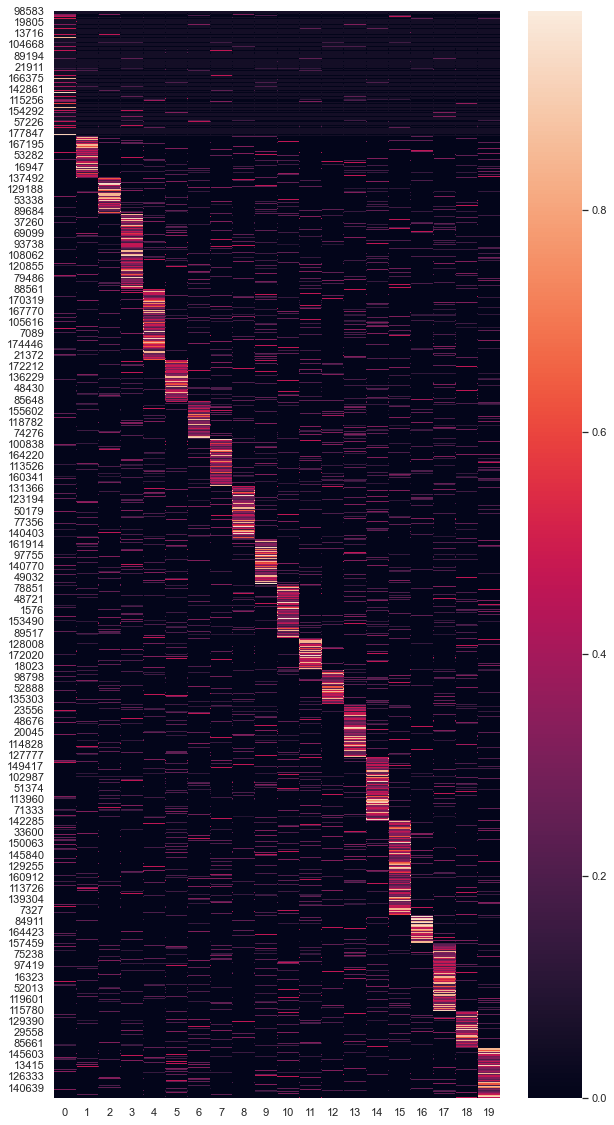

In [50]:
%matplotlib inline
import seaborn as sns; sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(document_topic.loc[document_topic.idxmax(axis=1).sort_values().index])

<AxesSubplot:>

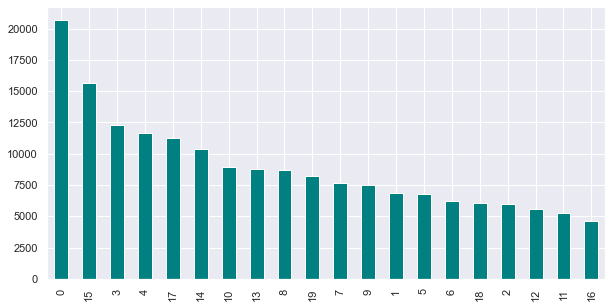

In [51]:
sns.set(rc={'figure.figsize':(10,5)})
document_topic.idxmax(axis=1).value_counts().plot.bar(color='teal')

In [52]:
#!pip3 install pyLDAvis
# https://cran.r-project.org/web/packages/LDAvis/vignettes/details.pdf
# Here a short legend to explain the vis:
# size of bubble: proportional to the proportions of the topics across the N total tokens in the corpus
# red bars: estimated number of times a given term was generated by a given topic
# blue bars: overall frequency of each term in the corpus
# -- Relevance of words is computed with a parameter lambda
# -- Lambda optimal value ~0.6 (https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf)
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)